# Traffic Signs Recognition and Classification using Keras

```
A very important feature in self-driving cars is to follow the traffic rules. In order to follow the traffic rules, following the traffic signals and traffic signs is mandatory . 

So we are going to design a neural network and feed it with some of the traffic sign images and train it.The model learns the hidden patterns of each traffic sign depicted in the image in such a way that it can recognize similar kind of images later. our neural network model is going to classify 43 different types of traffic sign images and recognize them accordingly!!

```

```
STEPS: 
            1. Importing required libraries.
            2  Visulaizing some images using matplotlib.
            3. Preparing dataset to feed the model.
            4. Splitting dataset into train and test datasets.
            5. Converting labels into 1d Hot-encoding vectors.
            6. Defining neural network model.
            7. Plotting the model.
            8. Summary of the model.
            9. Training model with training Dataset.
            10. Evaluating Accuracy of the model.
            11. Model Saving.
            12. Conclusion.
```     

## 1. Importing required libraries

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# 2. Visulaizing Some Images 

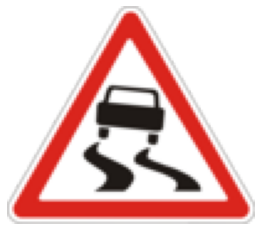

In [3]:
im=Image.open(r"C:\Users\User\Desktop\PROJECT 2\Meta\23.png")
plt.imshow(im)
plt.axis('off')
plt.show()

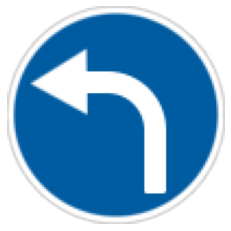

In [4]:
im=Image.open(r"C:\Users\User\Desktop\PROJECT 2\Meta\34.png")
plt.imshow(im)
plt.axis('off')
plt.show()

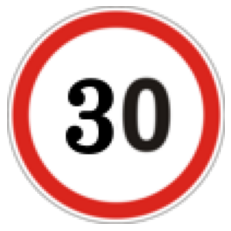

In [5]:
im=Image.open(r"C:\Users\User\Desktop\PROJECT 2\Meta\1.png")
plt.imshow(im)
plt.axis('off')
plt.show()

## 3. Preperaing the Dataset

```
After we unzip the Zip folder, we will see two folder seperately from train and test.Our train folder contains 43 folders each representing a different class. The range of the folder is from 0 to 42. With the help of the OS module, we iterate over all the classes and append images and their respective labels in the data and labels list.
```


In [7]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((100,100))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

```
These data and labels cannot be directly fed into our model. 

Before feeding them into model, we need to convert them into respective numpy arrays
```

In [8]:
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 100, 100, 3) (39209,)


## 4.Splitting training and testing dataset 
```

train_test_split() present in sklearn module helps us in  splitting data into random train and test subsets.

So we can see from aboc=ve that we totally consists of 39209 images.

Here our 32909 data is split into 31367 training images i.e. 80% of total images  and remaining 7842 as testing images ans we mentiomed the value of test_size below as 0.2.
```

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 100, 100, 3) (7842, 100, 100, 3) (31367,) (7842,)


## 5.Converting the labels into one hot encoding :

```
Since this classification is of type Multiclass, we need to converts our class vector  to binary class matrix.

```

In [10]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## 6. Defining model :
```
 Stack the Convoltuion2d layer,maxpooling layer,flatten,dense and dropout layers into a model. 
 Finally compile the model using categorical crossentropy loss function and adam optimizer.
```

In [11]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dropout(rate=0.5))

model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 7. Plotting our model :

```
Plot_model plots each layer present in our model along with shapes of input and output at each layer. 
```

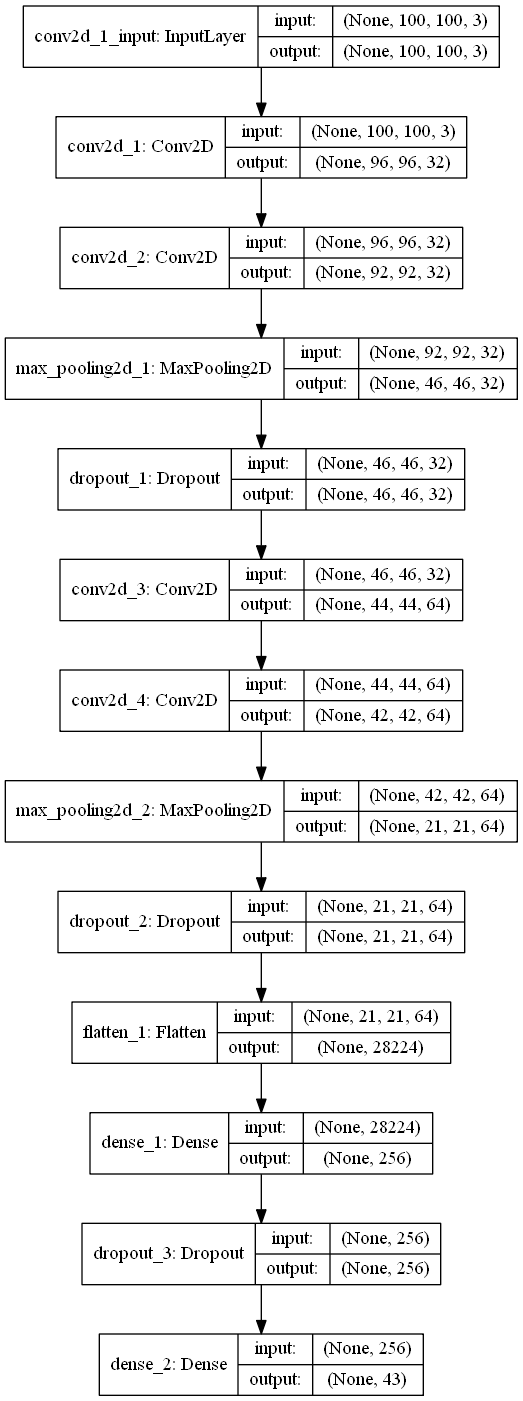

In [12]:
keras.utils.plot_model(model,"Traffic sign classification.png",show_shapes=True)

## 8. Summary of the model :

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 92, 92, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 42, 42, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 21, 64)       

## 9. Training the model with data using model.fit() : 
```
Now feed the model that we have defined earlier with the training data set.In order to do this we use model.fit() method present in keras.
```

In [ ]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

## 10. Accuracy of model :
```
model.evaluate function evaluates the model against the test dataset and compares the models results with the lables given to the images. Finally It returns the loss and accuracy values in form of probabilities. In order to convert these probabilities into percentages we multiply it with 100.

The accuracy of this model on test data is 97.5%
```

In [3]:
_acc=model.evaluate(X_test,y_test)
pint(acc*100)

97.4567656467


## 11. Saving the model :

In [ ]:
model.save("traffic_signs.h5")

## 12. Conclusion  :

```

In this deep neural netwrok classifier project, classification of traffic sign images is done with 95% accuracy and also seen the accuracy of our model on test data. 

```